<a href="https://colab.research.google.com/github/Lakshmijp/Assignment-01/blob/main/lakshmijp_assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

. Load the dataset into python environment


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('titanic_dataset (1).csv')


In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 Do all the necessary pre-processing steps


In [12]:
data.shape

(891, 12)

In [13]:
data['PassengerId'].nunique()

891

In [14]:

data1 = data.drop(['PassengerId', 'Name', 'Embarked'], axis=1)

In [15]:
data1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,1,1,female,35.0,1,0,113803,53.1000,C123
4,0,3,male,35.0,0,0,373450,8.0500,NaN


In [16]:
data1['Survived'].unique()

array([0, 1])

In [17]:
data1 = pd.get_dummies(data1)

In [18]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [21]:
data1.isna().sum()

Survived       0
Pclass         0
Age          177
SibSp          0
Parch          0
            ... 
Cabin_F33      0
Cabin_F38      0
Cabin_F4       0
Cabin_G6       0
Cabin_T        0
Length: 836, dtype: int64

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = data1['Survived']
x = data1.drop('Survived' , axis=1)

In [ ]:
### here we take age and fare column for scaling

In [45]:
x1=x.drop(['Pclass',	'Age	SibSp',	'Parch'],axis=1)])

SyntaxError: ignored

In [47]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler(feature_range=(0,1))

In [48]:
x=min_max_scaler.fit_transform(x)

In [49]:
type(x)

numpy.ndarray

In [ ]:
#converting array into dataframe

In [6]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
print (x_train)

     Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
331       1  45.5      0      0   28.5000           0         1   
733       2  23.0      0      0   13.0000           0         1   
382       3  32.0      0      0    7.9250           0         1   
704       3  26.0      1      0    7.8542           0         1   
813       3   6.0      4      2   31.2750           1         0   
..      ...   ...    ...    ...       ...         ...       ...   
106       3  21.0      0      0    7.6500           1         0   
270       1   NaN      0      0   31.0000           0         1   
860       3  41.0      2      0   14.1083           0         1   
435       1  14.0      1      2  120.0000           1         0   
102       1  21.0      0      1   77.2875           0         1   

     Ticket_110152  Ticket_110413  Ticket_110465  ...  Cabin_E8  Cabin_F E69  \
331              0              0              0  ...         0            0   
733              0              0  

In [ ]:
print(y_train)

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64


In [29]:
print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [30]:
print(x_test)

     Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Ticket_110152  \
709       3   NaN      1      1  15.2458           0         1              0   
439       2  31.0      0      0  10.5000           0         1              0   
840       3  20.0      0      0   7.9250           0         1              0   
720       2   6.0      0      1  33.0000           1         0              0   
39        3  14.0      1      0  11.2417           1         0              0   
..      ...   ...    ...    ...      ...         ...       ...            ...   
433       3  17.0      0      0   7.1250           0         1              0   
773       3   NaN      0      0   7.2250           0         1              0   
25        3  38.0      1      5  31.3875           1         0              0   
84        2  17.0      0      0  10.5000           1         0              0   
10        3   4.0      1      1  16.7000           1         0              0   

     Ticket_110413  Ticket_

Create kNN and SVM models

In [ ]:
##knn

In [52]:


from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [55]:
metric_k = []
neighbors = range(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier= classifier.fit(x_train,y_train)
  y_pred_kNN = classifier.predict(x_test)
  acc = accuracy_score(y_test, y_pred_kNN)
  metric_k.append(acc)

ValueError: ignored

ValueError: ignored

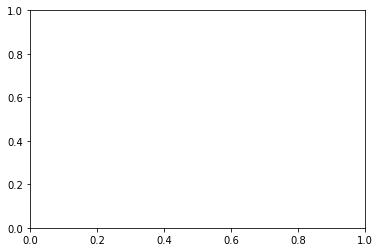

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

Do k-fold and stratified stratified k-fold cross validation techniques and find 
the average accuracy score of the models

In [57]:
from sklearn.model_selection import KFold

In [58]:
kfold_validator=KFold(10)

In [60]:
for train_index,test_index in kfold_validator.split(x,y):
    print('Training Index:',train_index)
    print('Test Index:',test_index)

Training Index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_result=cross_val_score(classifier,X,y,cv=kfold_validator)

In [ ]:
cv_result

In [61]:
np.mean(cv_result)

NameError: ignored